# Reinforcement Learning
# Project 3 - *Policy Gradient & Deep Reinforcement Learning*
## Team name: Wolves of Winterfell
### Team members: Yash Nitin Mantri
### UB Number: 50313926

### Environment Used:

Cartpole-v0

### Algorithm Used:

A2C (Advantage Actor Critic)

### Basic Idea:

1) Actor Advantage Critic(A2C) model is a popular model among policy gradient models.

2) In reinforcement learning, we have the agent moving through various states by taking actions to maximize it's reward.

3) The term “actor-critic” is best thought of as a framework or a class of algorithms satisfying the criteria that there exists parameterized actors and critics.

4) The actor is the policy πθ(a∣s) with parameters θ which conducts actions in an environment. The critic computes value functions to help assist the actor in learning. These are usually the state value, state-action value, or advantage value, denoted as V(s), Q(s,a), and A(s,a), respectively.

5) A2C takes in a state and generates two outputs: State value(Given by the "critic") and the policy(Given by the "actor").

6) A normal Deep Reinforcement model maps states to actions and/or states to state values. And A2C model does both.



### Algorithm Explanation:

1) The algorithm is an actor-critic based algorithm. Which means, it has two networks to train - An actor network, which predicts action based on the current state. The other network known as Critic network, evaluates the state and action. This is the case for all actor-critic networks.

2) A2C consists of a master network and worker networks.

3) We run 5 steps in parallel on each worker.

4) Each worker returns 5 (s, a, r, s).

5) This data is used to update the master network.

6) Since the update is done synchronously, only one copy of the network is required.

7) Variability comes from the fact that each worker has it's own (different) environment.(eg. Their start states might be different).

## Implementation of A2C:

The environment we've run the A2C algorithm on is the cartpole-v0 environment available in OpenAI Gym

In [1]:
import gym
import pylab
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# ENVIRONMENT
env_name = "CartPole-v0"

# global variables
env = gym.make(env_name)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
gamma = 0.975
learning_rate = 0.0002

In [0]:
class A2CAgent:
  # Initialize the agent
  def __init__(self):
    # Get the actor and critic models
    self.actor = self.actorModel()
    self.critic = self.criticModel()

  # Actor model
  def actorModel(self):
    model_1 = Sequential()
    model_1.add(Dense(256, input_dim=state_size, activation='relu') )
    model_1.add(Dense(action_size, input_dim=256, activation='softmax') )
    model_1.compile(optimizer=Adam(lr= learning_rate),loss='categorical_crossentropy')
    return model_1

  # Critic model
  def criticModel(self):
    model_2 = Sequential()
    model_2.add(Dense(256, input_dim=state_size, activation='relu') )
    model_2.add(Dense(1, input_dim=256, activation='linear') )
    model_2.compile(optimizer=Adam(lr= learning_rate),loss='mse')
    return model_2

  # Select action
  def get_action(self,state):
    policy = self.actor.predict(state,batch_size=1).flatten()
    return np.random.choice(action_size,1,p=policy)[0]

  # Update the model
  def train_model(self, state, action, q_value, next_state, terminate):
    # Initialize the policy targets matrix
    target = np.zeros((1,1))
    # Initialize the advantages matrix
    advantages = np.zeros((1,action_size))
    # Get value for current state
    value = self.critic.predict(state)[0]
    # Get value for next state
    next_value = self.critic.predict(next_state)[0]

    # update the advantages and value tables after termination
    if terminate:
      advantages[0][action] = q_value - value
      target[0][0] = q_value
    else:
      advantages[0][action] = q_value + gamma*(next_value) - value
      target[0][0] = q_value + gamma*next_value

    # Once we terminate the episode, we then update the weights
    self.actor.fit(state,advantages,epochs=1,verbose=0)
    self.critic.fit(state,target,epochs=1,verbose=0)

In [0]:
# Training
class A2C_train:
  def __init__(self, number_of_episodes):
    
    window = 5
    rewards_list = []
    total_average_reward = 0
    agent = A2CAgent()

    # Main Logic
    for counter in range(number_of_episodes):
      total_reward = 0
      terminate = False
      state = env.reset()
      state = np.reshape(state,[1,state_size])

      while not terminate:
        action = agent.get_action(state)
        next_state, reward, terminate, info = env.step(action)
        next_state = np.reshape(next_state,[1,state_size])
        agent.train_model(state,action,reward,next_state,terminate)
        total_reward += reward
        state = next_state

        if terminate:
          rewards_list.append(total_reward)
        
      if counter % 100 == 0:
        print ("episode %d"%counter)
        print ("total reward %d"%total_reward)

        df = pd.DataFrame(rewards_list, columns=['r'])
        rolling_mean = df['r'].rolling(window=window).mean()
        print('\n Rewards List Graph:')
        plt.plot(rolling_mean)
        plt.title("Rewards vs Epoch")
        plt.xlabel('Epoch - Number of iterations')
        plt.ylabel('Rewards')
        plt.grid(ls='--')
        plt.show()
        window = window + 15

    # Plot final graphs
    print('\n Rewards List Graph:')
    plt.plot(rewards_list)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


episode 0
total reward 28

 Rewards List Graph:


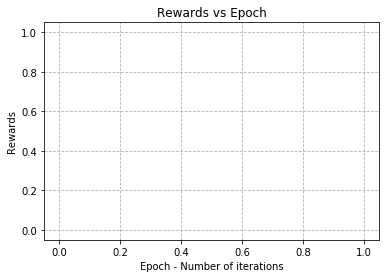

episode 100
total reward 10

 Rewards List Graph:


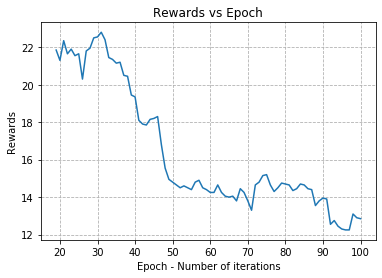

episode 200
total reward 12

 Rewards List Graph:


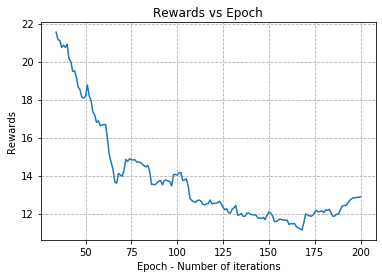

episode 300
total reward 37

 Rewards List Graph:


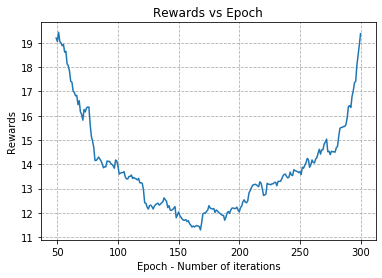

episode 400
total reward 16

 Rewards List Graph:


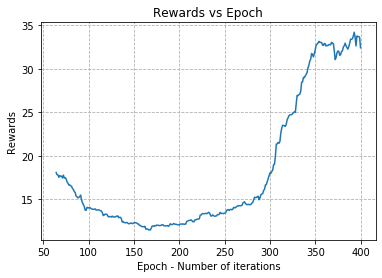

episode 500
total reward 37

 Rewards List Graph:


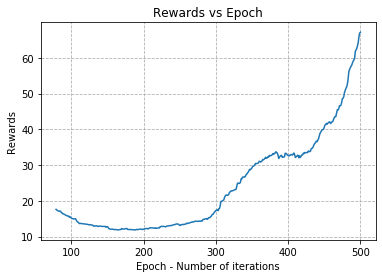

episode 600
total reward 95

 Rewards List Graph:


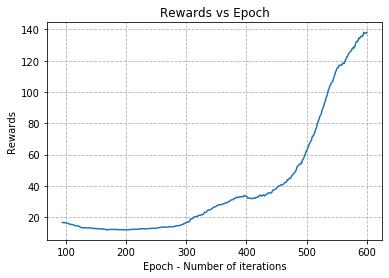

episode 700
total reward 102

 Rewards List Graph:


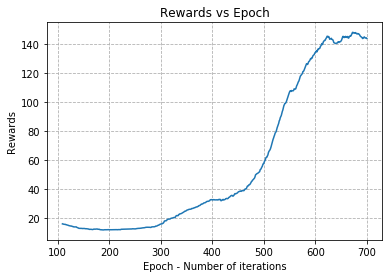


 Rewards List Graph:


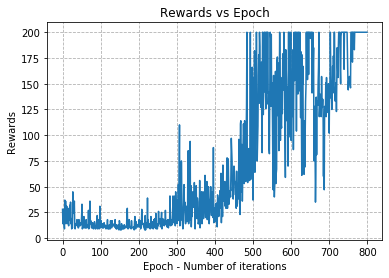

In [5]:
A2C_train(800)

References: 

https://github.com/openai/gym/wiki/Table-of-environments

https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f

https://danieltakeshi.github.io/2018/06/28/a2c-a3c/